In [81]:
# import necessary packages
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

%matplotlib  inline
pal = sns.set_palette(sns.color_palette("OrRd_r", 6))

In [82]:
# read in all three csv files
df_full = pd.read_csv('Recipes_Full.csv', index_col = 'Unnamed: 0')
df_cat = pd.read_csv('Recipes_Categories.csv', index_col = 'Unnamed: 0')
df_ingr = pd.read_csv('Recipes_Ingredients.csv', index_col = 'Unnamed: 0')

In [83]:
df_full.head()

,Title,Rating,Rating Group,Date Time,Calories,Protein,Fat,Sodium,22-Minute Meals,3-Ingredient Recipes,...,Whiskey,White Wine,Whole Wheat,Wild Rice,Wine,Wok,Yellow Squash,Yogurt,Yuca,Zucchini
0,"Lentil, Apple, and Turkey Wrap",2.500,2-3,2006-09-01 04:00:00.000,426.0,30.0,7.0,559.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,4-5,2004-08-20 04:00:00.000,403.0,18.0,23.0,1439.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,3-4,2004-08-20 04:00:00.000,165.0,6.0,7.0,165.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,4-5,2009-03-27 04:00:00.000,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,3-4,2004-08-20 04:00:00.000,547.0,20.0,32.0,452.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
pd.to_datetime(df_full['Date Time'])
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23762 entries, 0 to 23761
Columns: 597 entries, Title to Zucchini
dtypes: float64(594), object(3)
memory usage: 108.4+ MB


# Nutritional Data

We're provided with data on 'Calories', 'Protein', 'Fat', 'Sodium'. Let's see what the distribution of these variables are and if we can glean any insights from them. We will first study all the data together, and then by rating group to see if there's any variety.

In [85]:
# create nutritional_info list for easy extraction in for loops
nutritional_info = ['Calories', 'Protein', 'Fat', 'Sodium']

# pull summary statistics for nutritional info
df_full.describe()[nutritional_info].round(2)

,Calories,Protein,Fat,Sodium
count,18889.00,18810.00,18787.00,18885.00
mean,5837.73,112.02,320.17,5665.22
std,332539.47,4289.71,18938.80,307855.87
min,0.00,0.00,0.00,0.00
25%,186.00,3.00,7.00,70.00
50%,309.00,7.00,16.00,270.00
75%,558.00,24.00,32.00,677.00
max,30111218.00,236489.00,1722763.00,27675110.00


We have absurdly large max values and standard deviations because of some incorrectly scraped data. Let's look violin plots of our data.

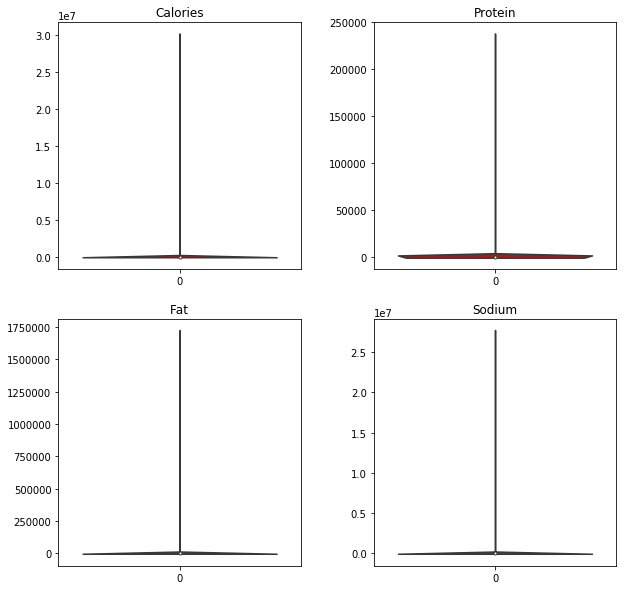

In [86]:
# violin plots for nutritional info
fig = plt.figure()
for k in range(4):    
    ax = fig.add_subplot(2,2,k+1)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    fig.subplots_adjust(wspace=.3)
    
    col = nutritional_info[k]
    sns.violinplot(data = df_full[col], orient='v')
    ax.set_title(nutritional_info[k])
    
# note 'Calories' and 'Sodium' are plotted with scientific notation

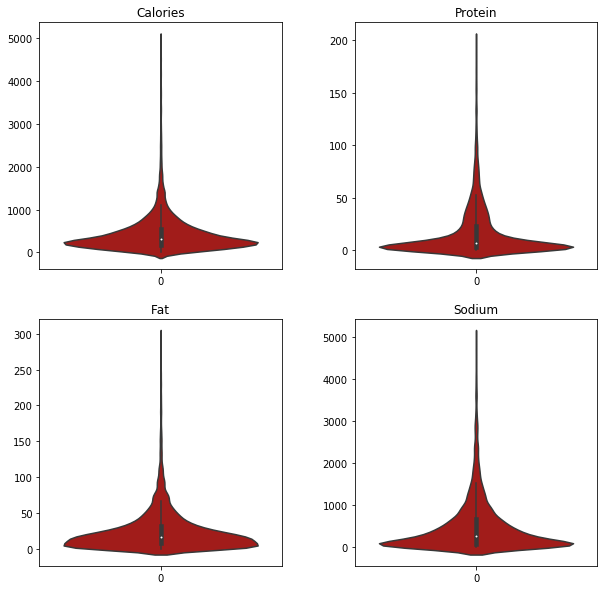

In [87]:
# we shouldn't include these outliers in our analysis

# keep limits in list for easy access
nutr_info_lim = [5000, 200, 300, 5000]

# violin plots for nutritional info
fig = plt.figure()
for k in range(4):    
    ax = fig.add_subplot(2,2,k+1)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    fig.subplots_adjust(wspace=.3)
    
    col = nutritional_info[k]
    sns.violinplot(data = df_full.loc[df_full[col] < nutr_info_lim[k]][col], orient='v')
    ax.set_title(nutritional_info[k])

We can see that a lot of our data is grouped within the 25% and 75% quartiles. Let's see how our data looks split up into rating groupings. This will also solidify what we should set our max limits to.

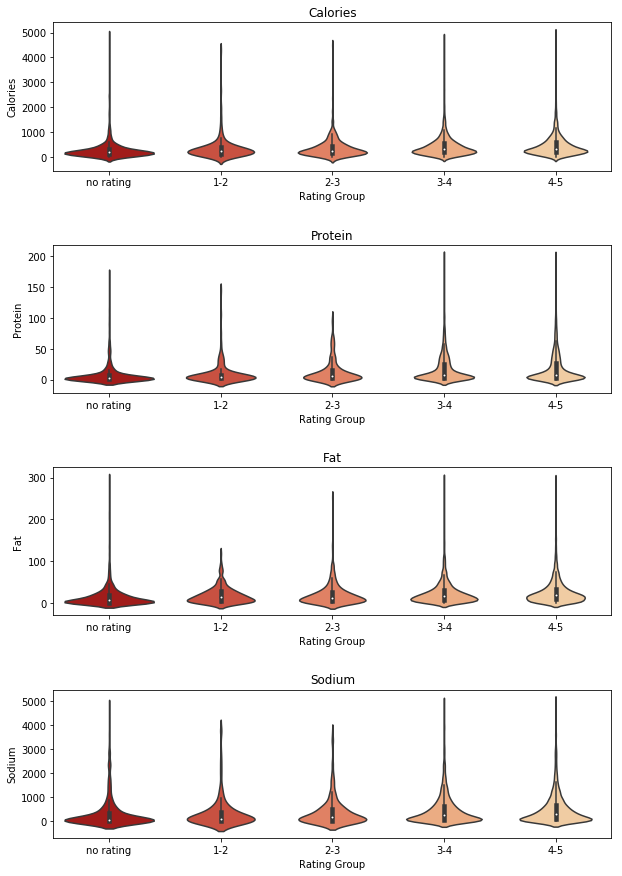

In [88]:
fig = plt.figure()
for k in range(4):    
    ax = fig.add_subplot(4,1,k+1)
    fig.set_figheight(15)
    fig.set_figwidth(10)
    fig.subplots_adjust(hspace=.5)
    
    col = nutritional_info[k]
    sns.violinplot(x='Rating Group', y=col, data=df_full.loc[df_full[col] < nutr_info_lim[k]], 
                   orient='v', order=['no rating', '1-2', '2-3', '3-4', '4-5'])
    ax.set_title(nutritional_info[k])

In [89]:
# create heatmap of ratings and calories
pivot_ratings_calories = df_full.loc[df_full['Calories'] < nutr_info_lim[0]].pivot_table(
    values = 'Title', index=['Rating'], columns='Calories', aggfunc='count')

fig = plt.figure(figsize=(8,6))
plt.clf()
#fig = sns.heatmap(pivot_ratings_calories)

plt.show()
pivot_ratings_calories

Calories,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,4570.0,4661.0,4718.0,4777.0,4790.0,4889.0,4898.0,4923.0,4929.0,4982.0
Rating,,,,,,,,,,,,,,,,,,,,,
0.000,9.0,1.0,5.0,1.0,NaN,1.0,4.0,6.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1.250,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.500,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.125,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3.750,9.0,6.0,4.0,1.0,5.0,NaN,8.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.375,NaN,NaN,4.0,9.0,4.0,NaN,1.0,NaN,4.0,NaN,...,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
5.000,8.0,NaN,4.0,NaN,5.0,NaN,NaN,NaN,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Frequencies

Next, let's study how often certain fields show up.

### Ratings

In [90]:
# retreive summary statistics for ratings
df_full.describe()['Rating']

count    23762.000000
mean         3.712493
std          1.355524
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: Rating, dtype: float64

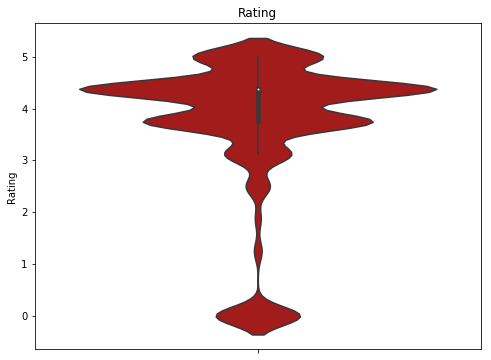

In [91]:
# violin plot for rating
fig = plt.figure(figsize=(8,6))
fig = sns.violinplot(y='Rating', data=df_full, orient='v')
fig.set_title('Rating')

Most ratings are quite high, or there are no ratings at all. This is a sign that most recipes are enjoyed by Epicurious users. When offering meals in their meal kit service, they should consider just using recipes whose average rating falls above the mean (at least when first starting out the business).

Let's look at the different rating groupings and see how many ratings fall in which groupings

In [92]:
# extract value counts of different rating groups
order = ['no rating', '1-2', '2-3', '3-4', '4-5']
freq_ratgrp = pd.DataFrame(df_full['Rating Group'].value_counts()).reindex(order)
print(freq_ratgrp)

           Rating Group
no rating          2218
1-2                 360
2-3                 636
3-4                7774
4-5               12774


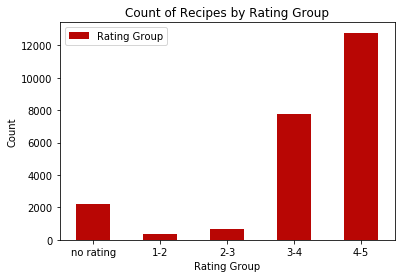

In [93]:
# plot the value counts of different rating groups in a bar graph
fig = plt.figure(figsize=(10,8))
fig = freq_ratgrp.plot(kind='bar')
fig.set_xlabel('Rating Group')
fig.set_ylabel('Count')
fig.set_title('Count of Recipes by Rating Group')
fig = plt.xticks(rotation=0)
#_.yaxis.grid(True,alpha=.5)
plt.show()

Most users are pretty happy about the recipes on the Epicurious site!

### Categories

In [94]:
categories = [cat for cat in df_cat.loc[:,'22-Minute Meals':]]

# calculate how many of each category appears in our dataset
cat_count = df_cat.loc[:,'22-Minute Meals':].sum().reset_index(
    name='count').sort_values('count', ascending=False)
cat_count.head(20)

,index,count
17,Bon Appétit,10785.0
166,Peanut Free,9798.0
214,Soy Free,9458.0
236,Tree Nut Free,8304.0
239,Vegetarian,8234.0
83,Gourmet,8092.0
111,Kosher,7305.0
169,Pescatarian,7132.0
182,Quick & Easy,6439.0
245,Wheat/Gluten-Free,5836.0


**Insights:** Category Groupings

* **Allergies** - There are quite a few categories that are formatted as '(ingredient) less'. Of the most common food allergens (aka 'The Top 8'), six of them are included above. 
* **Dietary Restrictions** - People don't eat certain foods for various reasons. Whether it's for religious, animal-welfare, health, or any other reasons, users are looking for recipes that fit their preferences. Note: there is overlap between some of these categories (for example, vegetarians and pescetarians).
* **Seasonal** - This is a category grouping that I wasn't expecting to see, but our outcome suggest that users are interested in eating foods that are in season.

These observations highlight the importance of providing customers with the option to state their dietary restrictions and allergies. Also that it might be useful to provide customers with certain recommendations depending on the season.

I predict that we'll see some clusters emerge based on these category groupings.

In [32]:
# find which categories have highest average rating

# initiate dictionary where keys are categories and values are lists of ratings
# if a recipe is in that category
cats_ratings = {categories[k]: [] for k in range(len(categories))}

# fill the dictionary
for cat in df_cat.loc[:,'22-Minute Meals':].columns:
    for i, row in df_cat.iterrows():
        if row[cat] == 1 and row['Rating'] > 0:
            cats_ratings[cat].append(row['Rating'])

In [ ]:
# compute rating averages for each category and insert into new dictionary
avg_cats_ratings = dict()
for key, l in cats_ratings.items():
    if l != []:
        avg_cats_ratings[key] = round(np.mean(l), 2)

# convert dictionary to dataframe and sort by highest average rating
avg_ratings = pd.DataFrame([avg_cats_ratings]).T
avg_ratings.columns = ['Avg Rating']
avg_ratings = avg_ratings.sort_values('Avg Rating', ascending=False)

print('Top 10 Highest Ratings:')
print(avg_ratings.head(10))
print()
print('Top 10 Lowest Ratings:')
print(avg_ratings.tail(10))

Top 10 Highest Ratings:
                  Avg Rating
Rub                     5.00
Brownie                 5.00
Flat Bread              5.00
Cookbook Critic         5.00
Cuba                    5.00
Cupcake                 5.00
Juicer                  4.79
Stock                   4.69
Soufflé/Meringue        4.69
Kentucky                4.69

Top 10 Lowest Ratings:
                     Avg Rating
Weelicious                 3.72
Kwanzaa                    3.68
Aperitif                   3.65
Oktoberfest                3.62
Pasta Maker                3.61
Mandoline                  3.55
Philippines                3.44
No Meat, No Problem        3.33
Kansas                     3.33
Pancake                    2.50


### Ingredients

In [95]:
# find most popular ingredients
ingr_count = df_ingr.loc[:,'Almond':].sum().reset_index(
    name='count').sort_values('count', ascending=False)
ingr_count.head(10)

,index,count
200,Onion,2714.0
319,Vegetable,2424.0
309,Tomato,2420.0
116,Fruit,2212.0
106,Egg,2030.0
137,Herb,1997.0
118,Garlic,1985.0
271,Sauce,1706.0
259,Roast,1598.0
70,Chicken,1496.0


There isn't much to be interpreted from this.

In [96]:
# find average number of ingredients per recipe

# calculate row totals for ingredients
df_ingr['Total Ingredients'] = df_ingr.loc[:,'Almond':].sum(axis=1)
df_ingr.head()

,Title,Rating,Rating Group,Date Time,Calories,Protein,Fat,Sodium,Almond,Amaretto,...,White Wine,Whole Wheat,Wild Rice,Wine,Wok,Yellow Squash,Yogurt,Yuca,Zucchini,Total Ingredients
0,"Lentil, Apple, and Turkey Wrap",2.500,2-3,2006-09-01 04:00:00.000,426.0,30.0,7.0,559.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,4-5,2004-08-20 04:00:00.000,403.0,18.0,23.0,1439.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,Potato and Fennel Soup Hodge,3.750,3-4,2004-08-20 04:00:00.000,165.0,6.0,7.0,165.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,4-5,2009-03-27 04:00:00.000,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,Spinach Noodle Casserole,3.125,3-4,2004-08-20 04:00:00.000,547.0,20.0,32.0,452.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [97]:
print('Average number of main ingredients in a recipe:', round(np.mean(df_ingr['Total Ingredients']),0))

Average number of main ingredients in a recipe: 4.0


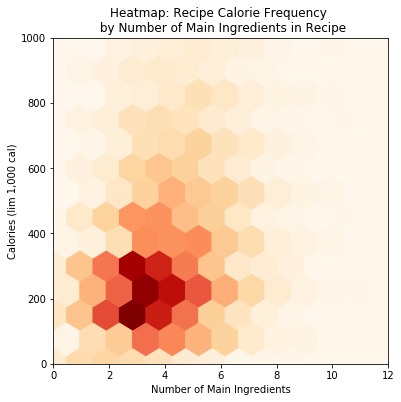

In [98]:
# do higher ratings have noticeable more or fewer ingredients
x = df_ingr.loc[df_ingr['Calories'] < 1500]['Total Ingredients']
y = df_ingr.loc[df_ingr['Calories'] < 1500]['Calories']

fig = plt.figure(figsize=(6,6))
fig = plt.hexbin(x, y, gridsize=19, cmap='OrRd')
fig = plt.ylim(0,1000)
fig = plt.xlim(0,12)
fig = plt.ylabel('Calories (lim 1,000 cal)')
fig = plt.xlabel('Number of Main Ingredients')
fig = plt.title('Heatmap: Recipe Calorie Frequency \n by Number of Main Ingredients in Recipe')
plt.show()

### Recipe Names

In [99]:
# display top 15 
df_full['Title'].value_counts().head(15)

Pastry Dough            66
Chicken Stock           50
Turkey Giblet Stock     48
Simple Syrup            29
Turkey Stock            29
Tomatillo Salsa         22
Pizza Dough             21
Salsa Verde             19
Pickled Red Onions      19
White Fish Stock        17
Corn Bread              16
Horseradish Cream       13
Saffron Mayonnaise      13
Avocado Salsa           13
Vegetable Stock         12
Name: Title, dtype: int64

An observation from this list is that many of these common recipe titles aren't for meals, but for a part of a meal. If Epicurious is looking to offer meal kits, they're not going to offer items such as 'Pastry Dough' and 'White Fish Stock' as meals. We will need a way to exclude these recipes from being recommended. They may emerge as their own cluster, but if not, we perhaps will need to filter our recipe titles on ending strings (e.g. 'Dough' and 'Stock' seem to be common ending strings).

The following code builds a wordcloud for some of the keywords in our recipe titles. This isn't really EDA, but I will likely use this in my slide deck.

In [100]:
import nltk

t = df_full.Title.apply(nltk.word_tokenize).sum()

In [101]:
from collections import Counter
from string import punctuation

def content_text(text):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    without_stp  = Counter()
    for word in text:
        word = word.lower()
        if len(word) < 3:
            continue
        if word not in stopwords:
            without_stp.update([word])
    return [(y,c) for y,c in without_stp.most_common(20)]

without_stop = content_text(t)
#without_stop

(-0.5, 799.5, 1199.5, -0.5)

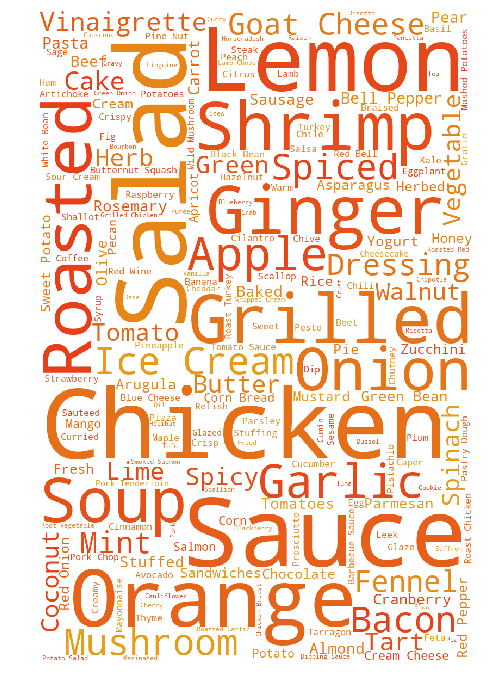

In [102]:
from PIL import Image
import random
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(t)
stopwords = set(STOPWORDS)

#change the value in return to set the single color need, in hsl format.
def red_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(%d, 80%%, 50%%)" % np.random.randint(10,40))

wordcloud = WordCloud(width=800, height=1200, background_color='white', max_font_size=180, 
                      stopwords=stopwords, random_state=2, relative_scaling=.5).generate(text)
wordcloud.recolor(color_func = red_color_func)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')

# Time Trends

Have certain types of recipes become more popular in recent years? When do seasonal recipes start to become popular?

In [103]:
# MOST POPULAR CATEGORIES

# create summary table of categoires by year
cat_by_year = df_cat.groupby(pd.to_datetime(df_cat['Date Time']).dt.year)[categories].sum()
cat_by_year = cat_by_year.loc[2005:,:]

In [104]:
# create list of categories that fall in the top 3 categories for the year at least once
# will use this list of categories to take extract from cat_by_year dataframe
top_cats = list()

# iterate through each year and append top categories to top_cats list
for i, row in cat_by_year.iterrows():
    #print(row.index)
    rl = list(row)
    for x in row.nlargest(4):
        index = rl.index(x)
        if categories[index] not in top_cats:
            top_cats.append(categories[index])

top_cats_df = cat_by_year[top_cats]
top_cats_df

,Peanut Free,Soy Free,Gourmet,Quick & Easy,Vegetarian,Tree Nut Free,Bon Appétit,Dinner,Kid-Friendly
Date Time,,,,,,,,,
2005.0,422.0,405.0,381.0,363.0,307.0,360.0,293.0,93.0,39.0
2006.0,802.0,775.0,501.0,534.0,692.0,667.0,614.0,108.0,114.0
2007.0,571.0,543.0,390.0,368.0,491.0,490.0,576.0,169.0,84.0
2008.0,497.0,494.0,323.0,277.0,355.0,446.0,311.0,298.0,77.0
2009.0,620.0,589.0,290.0,351.0,404.0,541.0,362.0,435.0,131.0
2010.0,421.0,413.0,56.0,225.0,296.0,373.0,405.0,241.0,47.0
2011.0,379.0,371.0,66.0,142.0,259.0,330.0,299.0,200.0,65.0
2012.0,435.0,408.0,136.0,129.0,352.0,375.0,245.0,166.0,64.0
2013.0,463.0,428.0,56.0,172.0,326.0,389.0,338.0,235.0,98.0


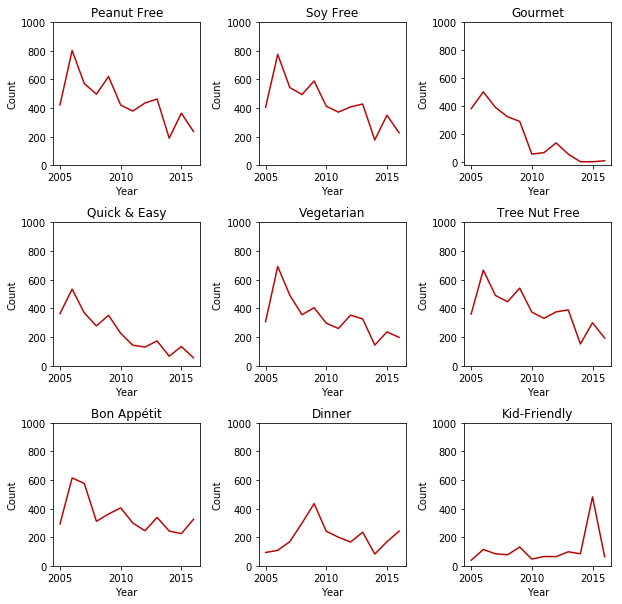

In [105]:
# there are 9 categories. Let's see if any trends stand out.
# plot individually or else graph is too cluttered
fig = plt.figure()
for k in range(len(top_cats)):
    ax = fig.add_subplot(3,3,k+1)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    fig.subplots_adjust(hspace=.4, wspace=.4)
    
    ax.plot(top_cats_df.iloc[:,k])
    plt.setp(ax, yticks=[0, 200, 400, 600, 800, 1000])
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_title(top_cats[k])   

Most of our most popular categories have actually been getting less popular in recent years. This could be a sign that the website is slowing down, since these categories above are still the most popular ones in recent years. I do find it interesting that Vegetarian recipes were so popular back in the mid 2000's and seeing a slight decrease, since I assumed it would be a category growing in popularity. Quck & Easy as well as Gourmet have also seen noticeable decreases, perhaps suggesting that users aren't necessarily interested in the type of meal it is but more interested in the ingredients.

One category that did hit a noticeable spike in recent years is Kid-Friedly recipes. I'm going to assume that if there's a large supply of Kid-Friendly recipes, there's probably a large demand. I think this is a reflection on Epicurious' user base. In the 2000's, most of their users were likely people in their 20's and 30's. People that were young enough to understand how to use Technology but still old enough to show an overall interest in cooking compared to younger generations. By 2015, these users were the ones that had kids they needed to feed and therefore were interested in Kid-Friendly recipes. I think it's important to know that this is Epicurious' main user base since this is who they should be marketing their meal kits to. There are so many meal kit services out there, so Epicurious should really try to appeal to its historical user base (at least initially) to begin a successful meal kit service.

In [106]:
# SEASONAL RECIPES

# list seasonal categories for easy access
seasons = ['Spring', 'Summer', 'Fall', 'Winter']

# construct pivot table of average count of that category in each month (2005 onwards)
seasonal_cat_by_month = df_cat.groupby(pd.to_datetime(df_cat.loc[2005:,:]['Date Time']).dt.month)[categories].mean()[seasons]
seasonal_cat_by_month.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
seasonal_cat_by_month

,Spring,Summer,Fall,Winter
Jan,0.032578,0.053824,0.065156,0.182720
Feb,0.075688,0.045872,0.041284,0.123853
Mar,0.180628,0.087696,0.068063,0.069372
Apr,0.228498,0.160462,0.016688,0.006418
May,0.090090,0.322523,0.054955,0.037838
Jun,0.081855,0.623465,0.015007,0.010914
Jul,0.045020,0.427012,0.028649,0.021828
Aug,0.095012,0.222809,0.165942,0.184664
Sep,0.009309,0.075798,0.219415,0.089096
Oct,0.011905,0.030952,0.340476,0.173016


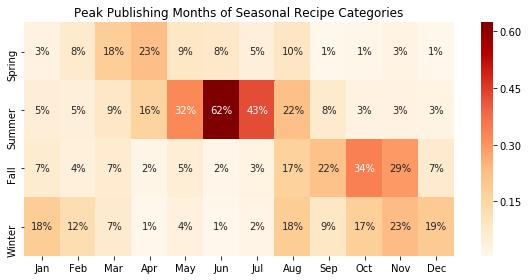

In [107]:
fig = plt.figure(figsize = (8,4))
plt.title("Peak Publishing Months of Seasonal Recipe Categories")
ax = sns.heatmap(seasonal_cat_by_month.T, annot=True, cmap='OrRd', fmt='.0%')
plt.tight_layout()
plt.show()

We can now see when seasonal recipes start to gain momentum/popularity. The heat map above displays the average number of recipes by seasonal category are published in specific months. We can see that Summer recipes are very popular, with the highest average of 62%. Though I'm sure that if we include categories such as 'Christmas' or 'Halloween' by season, we would see some higher averages in other seasons. Using this heat map, we can determine the best times for publishing seasonal recipes. They are as follows:

* Spring: March
* Summer: April or May
* Fall: August
* Winter: October

The summer and winter periods seem to last a bit longer than Fall and Spring. Spring looks especially short. It's good to know when these peak periods are though in the meal kit service line because Epicurious can prepare its supply chain in order to deliver meals in a timely fashion.